In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import skew 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
description = open("../input/house-prices-advanced-regression-techniques/data_description.txt", "r")


In [5]:
print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000,1459.000,1232.000,1459.000,1459.000,1459.000,1459.000,1459.000,1444.000,1458.000,...,1458.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000
mean,2190.000,57.378,68.580,9819.161,6.079,5.554,1971.358,1983.663,100.709,439.204,...,472.769,93.175,48.314,24.243,1.794,17.064,1.744,58.168,6.104,2007.770
std,421.321,42.747,22.377,4955.517,1.437,1.114,30.390,21.130,177.626,455.268,...,217.049,127.745,68.883,67.228,20.208,56.610,30.492,630.807,2.722,1.302
min,1461.000,20.000,21.000,1470.000,1.000,1.000,1879.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000
25%,1825.500,20.000,58.000,7391.000,5.000,5.000,1953.000,1963.000,0.000,0.000,...,318.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2007.000
50%,2190.000,50.000,67.000,9399.000,6.000,5.000,1973.000,1992.000,0.000,350.500,...,480.000,0.000,28.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000
75%,2554.500,70.000,80.000,11517.500,7.000,6.000,2001.000,2004.000,164.000,753.500,...,576.000,168.000,72.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000
max,2919.000,190.000,200.000,56600.000,10.000,9.000,2010.000,2010.000,1290.000,4010.000,...,1488.000,1424.000,742.000,1012.000,360.000,576.000,800.000,17000.000,12.000,2010.000


In [12]:
null_counts_train = train.isnull().sum()
null_counts_train[null_counts_train>0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [13]:
null_counts_test = test.isnull().sum()
null_counts_test[null_counts_test>0].sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [14]:
percentage_of_nulls_train = null_counts_train[null_counts_train>0].sort_values(ascending = False)/test['Id'].count()*100
percentage_of_nulls_train

PoolQC         99.589
MiscFeature    96.367
Alley          93.831
Fence          80.809
FireplaceQu    47.293
LotFrontage    17.752
GarageYrBlt     5.552
GarageType      5.552
GarageFinish    5.552
GarageQual      5.552
GarageCond      5.552
BsmtFinType2    2.605
BsmtExposure    2.605
BsmtFinType1    2.536
BsmtCond        2.536
BsmtQual        2.536
MasVnrArea      0.548
MasVnrType      0.548
Electrical      0.069
dtype: float64

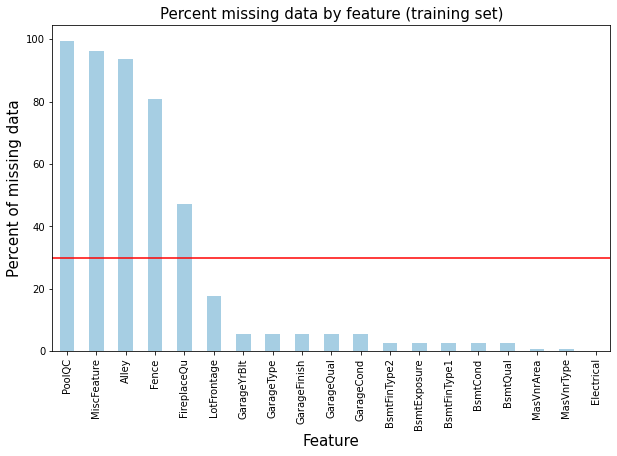

In [15]:
plt.figure(figsize = (10,6))
percentage_of_nulls_train.plot(kind='bar', colormap='Paired')
plt.xticks(rotation='90')
plt.title('Percent missing data by feature (training set)', fontsize = 15)
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Percent of missing data',fontsize = 15)
plt.axhline(y=30, color='r', linestyle='-')
plt.show()

In [16]:
percentage_of_nulls_test = null_counts_test[null_counts_test>0].sort_values(ascending = False)/test['Id'].count()*100
percentage_of_nulls_test

PoolQC         99.794
MiscFeature    96.504
Alley          92.666
Fence          80.123
FireplaceQu    50.034
LotFrontage    15.559
GarageYrBlt     5.346
GarageCond      5.346
GarageQual      5.346
GarageFinish    5.346
GarageType      5.209
BsmtCond        3.084
BsmtExposure    3.016
BsmtQual        3.016
BsmtFinType1    2.879
BsmtFinType2    2.879
MasVnrType      1.097
MasVnrArea      1.028
MSZoning        0.274
BsmtFullBath    0.137
BsmtHalfBath    0.137
Utilities       0.137
Functional      0.137
Exterior2nd     0.069
Exterior1st     0.069
SaleType        0.069
BsmtFinSF1      0.069
BsmtFinSF2      0.069
BsmtUnfSF       0.069
KitchenQual     0.069
GarageCars      0.069
GarageArea      0.069
TotalBsmtSF     0.069
dtype: float64

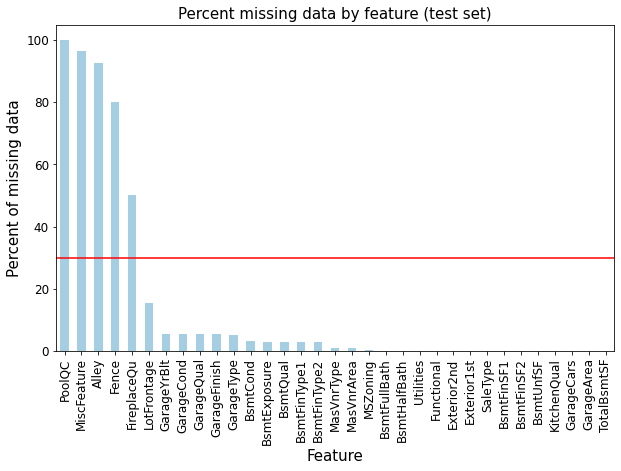

In [17]:
plt.figure(figsize = (10,6))
percentage_of_nulls_test.plot(kind = 'bar',fontsize=12,colormap='Paired')
plt.title('Percent missing data by feature (test set)', fontsize = 15)
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Percent of missing data',fontsize = 15)
plt.axhline(y=30, color='r', linestyle='-')
plt.show()

In [18]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1,inplace = True)
test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1,inplace = True)

In [19]:
train['LotFrontage'] = train['LotFrontage'].fillna(value=train.groupby('Neighborhood')['LotFrontage'].transform('median'))

In [20]:
test['LotFrontage'] = test['LotFrontage'].fillna(value=test.groupby('Neighborhood')['LotFrontage'].transform('median'))

In [21]:
train['LotFrontage'].isnull().sum()

0

In [22]:
null_garages_train = train[(train['GarageYrBlt'].isnull()) | (train['GarageType'].isnull()) | (train['GarageFinish'].isnull()) 
      | (train['GarageQual'].isnull()) | (train['GarageCond'].isnull())]

In [23]:
null_garages_train_n = null_garages_train.isnull().sum()
null_garages_train_n[null_garages_train_n>0].sort_values(ascending = False)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
BsmtFinType2     7
BsmtFinType1     7
BsmtExposure     7
BsmtCond         7
BsmtQual         7
dtype: int64

In [24]:
for i in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    train[i] = train[i].fillna('None')

In [25]:
train[['GarageType','GarageFinish','GarageQual','GarageCond']].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [26]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

In [27]:
train['GarageYrBlt'].isnull().sum()

0

In [28]:
null_garages_test = test[(test['GarageYrBlt'].isnull()) | (test['GarageType'].isnull()) | (test['GarageFinish'].isnull()) 
      | (test['GarageQual'].isnull()) | (test['GarageCond'].isnull()) | (test['GarageCars'].isnull()) | (test['GarageArea'].isnull())]

In [29]:
null_garages_test_n = null_garages_test.isnull().sum()
null_garages_test_n[null_garages_test_n>0].sort_values(ascending = False)

GarageCond      78
GarageQual      78
GarageFinish    78
GarageYrBlt     78
GarageType      76
BsmtFinType2     7
BsmtFinType1     7
BsmtExposure     7
BsmtCond         7
BsmtQual         7
GarageArea       1
GarageCars       1
MasVnrArea       1
MasVnrType       1
Exterior2nd      1
Exterior1st      1
dtype: int64

In [30]:
for i in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    test[i] = test[i].fillna('None')

In [31]:
for j in ('GarageYrBlt','GarageCars','GarageArea'):
    test[j] = test[j].fillna(0)

In [32]:
null_bsmt_train = train[(train['BsmtFinType2'].isnull()) | (train['BsmtExposure'].isnull()) | (train['BsmtFinType1'].isnull()) 
      | (train['BsmtCond'].isnull()) | (train['BsmtQual'].isnull())]

In [33]:
null_bsmt_train_n = null_bsmt_train.isnull().sum()
null_bsmt_train_n[null_bsmt_train_n>0].sort_values(ascending = False)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
dtype: int64

In [34]:
for i in ('BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual'):
    train[i] = train[i].fillna('None')

In [35]:
train[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']].isnull().sum()

BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtCond        0
BsmtQual        0
dtype: int64

In [36]:
null_bsmt_test = test[(test['BsmtFinType2'].isnull()) | (test['BsmtExposure'].isnull()) | (test['BsmtFinType1'].isnull()) 
      | (test['BsmtCond'].isnull()) | (test['BsmtQual'].isnull()) | (test['BsmtFullBath'].isnull()) 
      | (test['BsmtHalfBath'].isnull()) | (test['BsmtFinSF1'].isnull()) | (test['BsmtFinSF2'].isnull()) 
      | (test['BsmtUnfSF'].isnull())]

In [37]:
null_bsmt_test_n = null_bsmt_test.isnull().sum()
null_bsmt_test_n[null_bsmt_test_n>0].sort_values(ascending = False)

BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType2    42
BsmtFinType1    42
MSZoning         3
BsmtHalfBath     2
BsmtFullBath     2
Functional       1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
BsmtFinSF1       1
Utilities        1
dtype: int64

In [38]:
for i in ('BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual'):
    test[i] = test[i].fillna('None')

In [39]:
for j in ('BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'):
    test[j] = test[j].fillna(0)

In [40]:
train[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual',
      'BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].isnull().sum()

BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtCond        0
BsmtQual        0
BsmtFullBath    0
BsmtHalfBath    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

In [41]:
null_counts_train = train.isnull().sum()
null_counts_train[null_counts_train>0].sort_values(ascending = False)

MasVnrArea    8
MasVnrType    8
Electrical    1
dtype: int64

In [42]:
null_counts_test = test.isnull().sum()
null_counts_test[null_counts_test>0].sort_values(ascending = False)

MasVnrType     16
MasVnrArea     15
MSZoning        4
Functional      2
Utilities       2
SaleType        1
KitchenQual     1
Exterior2nd     1
Exterior1st     1
dtype: int64

In [43]:
null_masvnr_train = train[(train['MasVnrType'].isnull()) | (train['MasVnrArea'].isnull())]

In [44]:
null_masvnr_train_n = null_masvnr_train.isnull().sum()
null_masvnr_train_n[null_masvnr_train_n>0].sort_values(ascending = False)

MasVnrArea    8
MasVnrType    8
dtype: int64

In [45]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [46]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [47]:
null_masvnr_test = test[(test['MasVnrType'].isnull()) | (test['MasVnrArea'].isnull())]

In [48]:
null_masvnr_test_n = null_masvnr_test.isnull().sum()
null_masvnr_test_n[null_masvnr_test_n>0].sort_values(ascending = False)

MasVnrType    16
MasVnrArea    15
dtype: int64

In [49]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [50]:
test['MasVnrType'] = test['MasVnrType'].fillna('None')

In [51]:
train.dropna(inplace= True)

In [52]:
test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [53]:
test[test['MSZoning'].isnull()][['Id','Neighborhood']]

,Id,Neighborhood
455,1916,IDOTRR
756,2217,IDOTRR
790,2251,IDOTRR
1444,2905,Mitchel


In [54]:
test[test['Neighborhood'] == 'IDOTRR'].groupby('MSZoning').count()['Neighborhood']

MSZoning
C (all)    13
RM         40
Name: Neighborhood, dtype: int64

In [55]:
test[test['Neighborhood'] == 'Mitchel'].groupby('MSZoning').count()['Neighborhood']

MSZoning
RL    60
RM     4
Name: Neighborhood, dtype: int64

In [56]:
test['MSZoning'] = test.groupby('Neighborhood')['MSZoning'].fillna(value='RM',limit=2)

In [57]:
test['MSZoning'] = test['MSZoning'].fillna('RL')

In [58]:
test[test['Id']==1916]['MSZoning']

455    RM
Name: MSZoning, dtype: object

In [59]:
test['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [60]:
test['Functional'] = test['Functional'].fillna('Typ')

In [61]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [62]:
train['Utilities'].value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

In [63]:
test['Utilities'] = test['Utilities'].fillna('AllPub')

In [64]:
train = train[train['Utilities']!='NoSeWa']

In [65]:
test['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [66]:
test[test['SaleType'].isnull()]['Neighborhood']

1029    Sawyer
Name: Neighborhood, dtype: object

In [67]:
test[test['Neighborhood']=='Sawyer'].groupby('SaleType').count()['Neighborhood']

SaleType
COD     3
Oth     1
WD     72
Name: Neighborhood, dtype: int64

In [68]:
test['SaleType'] = test['SaleType'].fillna('WD')

In [69]:
test['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [70]:
test[test['KitchenQual'].isnull()]['Neighborhood']

95    ClearCr
Name: Neighborhood, dtype: object

In [71]:
test[test['Neighborhood']=='ClearCr'].groupby('KitchenQual').count()['Neighborhood']

KitchenQual
Gd     5
TA    10
Name: Neighborhood, dtype: int64

In [72]:
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

In [73]:
test[test['Exterior1st'].isnull()]['Exterior2nd']

691    NaN
Name: Exterior2nd, dtype: object

In [74]:
test[test['Exterior1st'].isnull()]['Neighborhood']

691    Edwards
Name: Neighborhood, dtype: object

In [75]:
test[test['Neighborhood']=='Edwards'].groupby('Exterior1st').count()['Neighborhood']

Exterior1st
AsbShng     4
BrkFace     3
CemntBd     1
HdBoard    13
MetalSd    14
Plywood    11
VinylSd    18
Wd Sdng    22
WdShing     7
Name: Neighborhood, dtype: int64

In [76]:
test[test['Neighborhood']=='Edwards'].groupby('Exterior2nd').count()['Neighborhood']

Exterior2nd
AsbShng     2
CmentBd     1
HdBoard     8
MetalSd    14
Plywood    20
Stucco      1
VinylSd    17
Wd Sdng    24
Wd Shng     6
Name: Neighborhood, dtype: int64

In [77]:
test['Exterior1st'] = test['Exterior1st'].fillna('Wd Sdng')
test['Exterior2nd'] = test['Exterior2nd'].fillna('Plywood')

In [78]:
null_counts_test = test.isnull().sum()
null_counts_test[null_counts_test>0].sort_values(ascending = False)

Series([], dtype: int64)

In [79]:
def to_numeric1(col):
    if col == 'Ex':
        return 5
    elif col == 'Gd':
        return 4
    elif col == 'TA':
        return 3
    elif col == 'Fa':
        return 2
    elif col == 'Po':
        return 1

In [80]:
train['ExterQual'] = train['ExterQual'].apply(lambda x:to_numeric1(x))
test['ExterQual'] = test['ExterQual'].apply(lambda x:to_numeric1(x))
train['ExterCond'] = train['ExterCond'].apply(lambda x:to_numeric1(x))
test['ExterCond'] = test['ExterCond'].apply(lambda x:to_numeric1(x))
train['HeatingQC'] = train['HeatingQC'].apply(lambda x:to_numeric1(x))
test['HeatingQC'] = test['HeatingQC'].apply(lambda x:to_numeric1(x))
train['KitchenQual'] = train['KitchenQual'].apply(lambda x:to_numeric1(x))
test['KitchenQual']= test['KitchenQual'].apply(lambda x:to_numeric1(x))

In [81]:
def to_numeric2(col):
    if col == 'Ex':
        return 5
    elif col == 'Gd':
        return 4
    elif col == 'TA':
        return 3
    elif col == 'Fa':
        return 2
    elif col == 'Po':
        return 1
    else:
        return 0

In [82]:
train['BsmtQual'] = train['BsmtQual'].apply(lambda x:to_numeric2(x))
test['BsmtQual'] = test['BsmtQual'].apply(lambda x:to_numeric2(x))
train['BsmtCond'] = train['BsmtCond'].apply(lambda x:to_numeric2(x))
test['BsmtCond'] = test['BsmtCond'].apply(lambda x:to_numeric2(x))
train['GarageQual'] = train['GarageQual'].apply(lambda x:to_numeric2(x))
test['GarageQual'] = test['GarageQual'].apply(lambda x:to_numeric2(x))
train['GarageCond'] = train['GarageCond'].apply(lambda x:to_numeric2(x))
test['GarageCond'] = test['GarageCond'].apply(lambda x:to_numeric2(x))

In [83]:
def to_numeric3(col):
    if col == 'GLQ':
        return 6
    elif col == 'ALQ':
        return 5
    elif col == 'BLQ':
        return 4
    elif col == 'Rec':
        return 3
    elif col == 'LwQ':
        return 2
    elif col == 'Unf':
        return 1
    else:
        return 0

In [84]:
train['BsmtFinType1'] = train['BsmtFinType1'].apply(lambda x:to_numeric3(x))
test['BsmtFinType1'] = test['BsmtFinType1'].apply(lambda x:to_numeric3(x))
train['BsmtFinType2'] = train['BsmtFinType2'].apply(lambda x:to_numeric3(x))
test['BsmtFinType2'] = test['BsmtFinType2'].apply(lambda x:to_numeric3(x))

In [85]:
train['GarageFinish'] = train['GarageFinish'].replace(['Fin','RFn','Unf','None'],[3,2,1,0])
test['GarageFinish'] = test['GarageFinish'].replace(['Fin','RFn','Unf','None'],[3,2,1,0])

In [86]:
train['PavedDrive'] = train['PavedDrive'].replace(['Y','P','N'],[3,2,1])
test['PavedDrive'] = test['PavedDrive'].replace(['Y','P','N'],[3,2,1])

In [87]:
train['BsmtExposure'] = train['BsmtExposure'].replace(['Gd','Av','Mn','No','None'],[4,3,2,1,0])
test['BsmtExposure'] = test['BsmtExposure'].replace(['Gd','Av','Mn','No','None'],[4,3,2,1,0])


In [88]:
train['HouseStyle'] = train['HouseStyle'].replace(['1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl'],
                                                  [1,2,3,4,5,6,3,3])
test['HouseStyle'] = test['HouseStyle'].replace(['1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl'],
                                                  [1,2,3,4,5,6,3,3])

In [89]:
train['RoofMatl'].value_counts()

CompShg    1432
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [90]:
def roof_mat(col):
    if col == 'WdShake' or col == 'WdShngl' or col == 'Metal' or col == 'Roll' or col == 'Membran':
        return 'Other'
    else:
        return col

In [91]:
train['RoofMatl'] = train['RoofMatl'].apply(lambda x:roof_mat(x))
test['RoofMatl'] = test['RoofMatl'].apply(lambda x:roof_mat(x))

In [92]:
train['Exterior1st'].value_counts()

VinylSd    514
HdBoard    221
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [93]:
def ext1st(col):
    if col == 'Stone' or col == 'BrkComm' or col == 'CBlock' or col == 'ImStucc' or col == 'AsphShn':
        return 'Other'
    else:
        return col

In [94]:
train['Exterior1st'] = train['Exterior1st'].apply(lambda x:ext1st(x))
test['Exterior1st'] = test['Exterior1st'].apply(lambda x:ext1st(x))

In [95]:
train['Exterior2nd'].value_counts()

VinylSd    503
MetalSd    214
HdBoard    206
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [96]:
def ext2nd(col):
    if col == 'AsphShn' or col == 'CBlock':
        return 'Other'
    else:
        return col

In [97]:
train['Exterior2nd'] = train['Exterior2nd'].apply(lambda x:ext2nd(x))
test['Exterior2nd'] = test['Exterior2nd'].apply(lambda x:ext2nd(x))

In [98]:
train['Heating'].value_counts()

GasA     1426
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [99]:
def heating(col):
    if col == 'GasA':
        return col
    else:
        return 'Other'

In [100]:
train['Heating'] = train['Heating'].apply(lambda x:heating(x))
test['Heating'] = test['Heating'].apply(lambda x:heating(x))

In [101]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [102]:
def electr(col):
    if col == 'FuseP' or col == 'Mix':
        return 'Other'
    else:
        return col

In [103]:
train['Electrical'] = train['Electrical'].apply(lambda x:electr(x))
test['Electrical'] = test['Electrical'].apply(lambda x:electr(x))

In [104]:
train_not_obj = train.dtypes[train.dtypes != 'object'].index
test_not_obj = test.dtypes[train.dtypes != 'object'].index
train_skew = train[train_not_obj].apply(lambda x:skew(x)).sort_values(ascending=False)
test_skew = test[test_not_obj].apply(lambda x:skew(x)).sort_values(ascending=False)

In [105]:
high_skewed_train = train_skew[train_skew > abs(1)]
high_skewed_test = test_skew[train_skew > abs(1)]

In [106]:
high_skewed_train_index = high_skewed_train.index
high_skewed_test_index = high_skewed_test.index

In [107]:
for i in high_skewed_train_index:
    train[i] = np.log(train[i]+1)

In [108]:
for i in high_skewed_test_index:
    test[i] = np.log(test[i]+1)

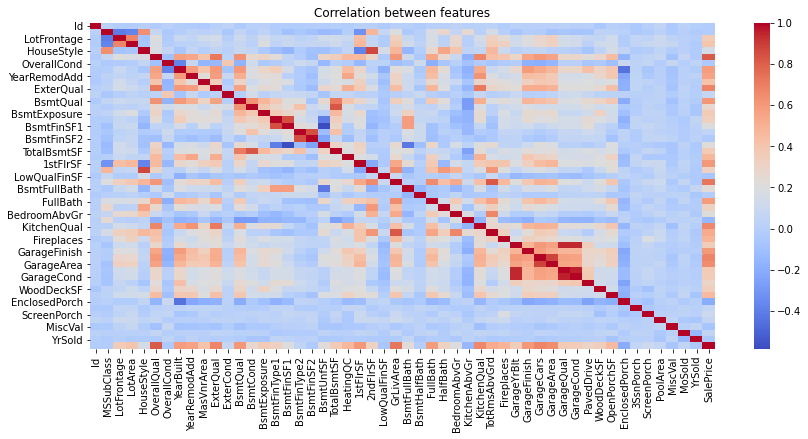

In [109]:
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(),cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

In [110]:
corr_saleprice = train.corr()['SalePrice'].sort_values(ascending = False)[1:]

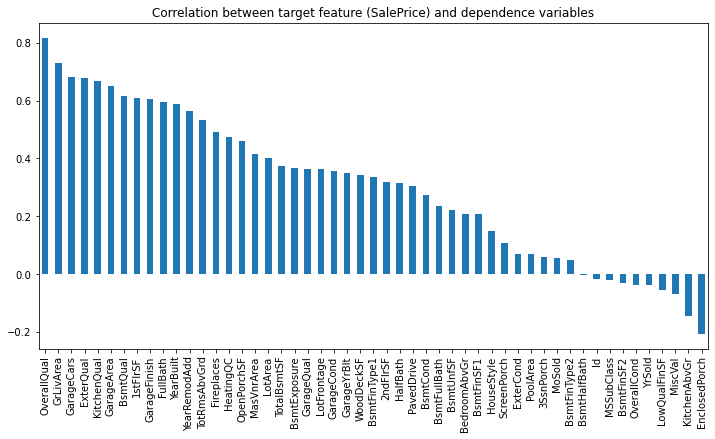

In [111]:
plt.figure(figsize=(12,6))
corr_saleprice.plot(kind='bar')
plt.title('Correlation between target feature (SalePrice) and dependence variables')
plt.show()

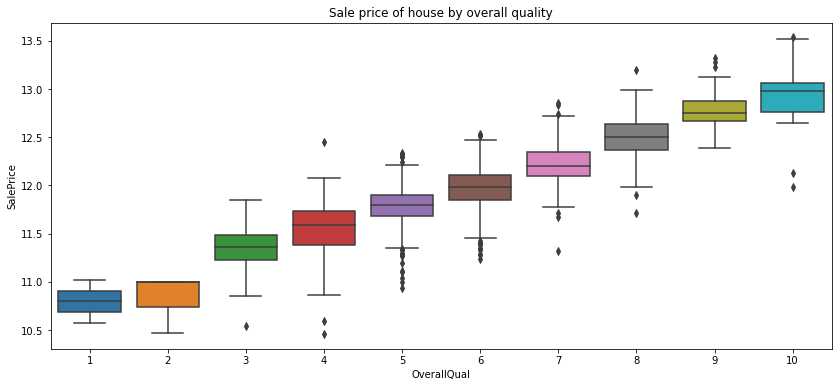

In [112]:
plt.figure(figsize=(14,6))
sns.boxplot(x='OverallQual', y = 'SalePrice', data = train)
plt.title('Sale price of house by overall quality')
plt.show()

Text(0.5, 1.0, 'Sale Price vs Ground living Area')

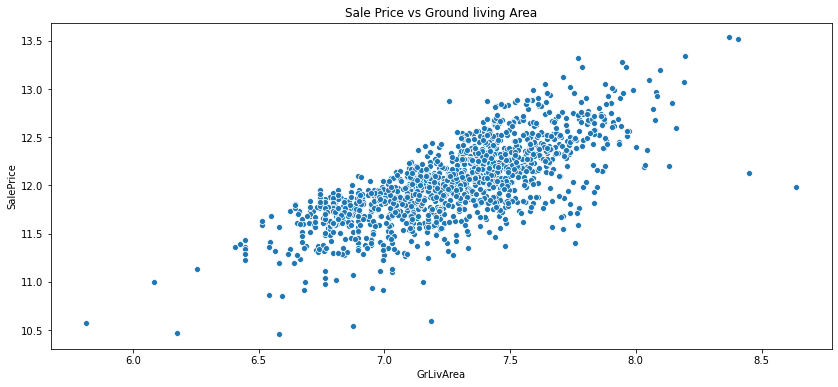

In [113]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train)
plt.title('Sale Price vs Ground living Area')

In [114]:
train = train[train['GrLivArea']<8]

Text(0.5, 1.0, 'GarageCars')

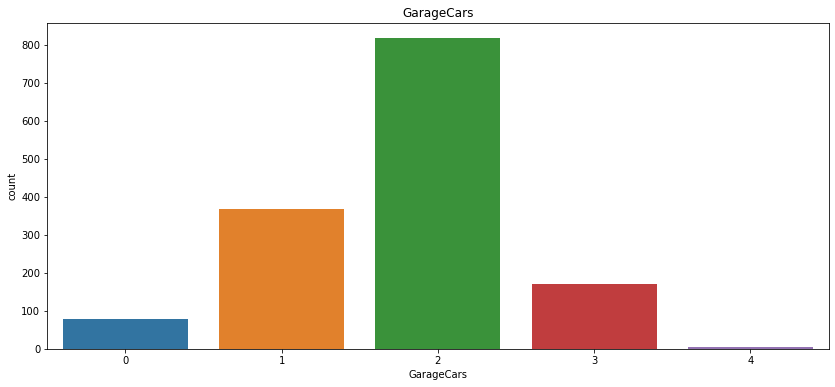

In [115]:
plt.figure(figsize=(14,6))
sns.countplot(x = 'GarageCars', data = train)
plt.title('GarageCars')

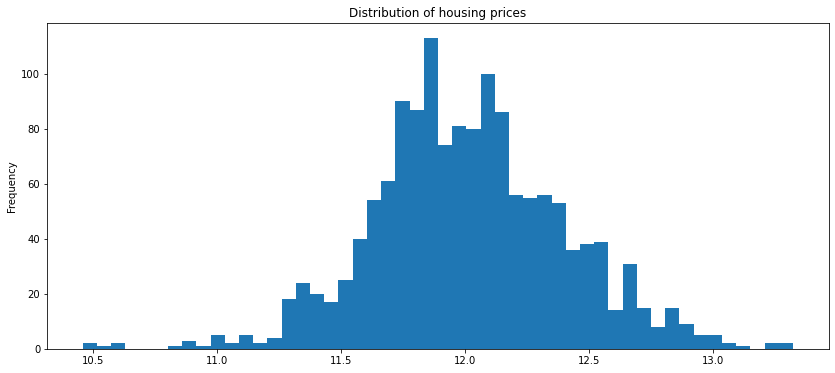

In [116]:
plt.figure(figsize=(14,6))
train['SalePrice'].plot.hist(bins = 50)
plt.title('Distribution of housing prices')
plt.show()

In [117]:
stats.kstest(train['SalePrice'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [118]:
train.drop('Condition2',axis = 1, inplace = True)
test.drop('Condition2',axis = 1, inplace = True)

In [119]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.111,RL,4.190,9.042,Pave,Reg,Lvl,AllPub,Inside,...,0.000,0.000,0.000,0.000,0.000,2,2008,WD,Normal,12.248
1,2,3.045,RL,4.394,9.170,Pave,Reg,Lvl,AllPub,FR2,...,0.000,0.000,0.000,0.000,0.000,5,2007,WD,Normal,12.109
2,3,4.111,RL,4.234,9.328,Pave,IR1,Lvl,AllPub,Inside,...,0.000,0.000,0.000,0.000,0.000,9,2008,WD,Normal,12.317
3,4,4.263,RL,4.111,9.164,Pave,IR1,Lvl,AllPub,Corner,...,5.609,0.000,0.000,0.000,0.000,2,2006,WD,Abnorml,11.849
4,5,4.111,RL,4.443,9.565,Pave,IR1,Lvl,AllPub,FR2,...,0.000,0.000,0.000,0.000,0.000,12,2008,WD,Normal,12.429


In [120]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3.045,RH,4.394,9.361,Pave,Reg,Lvl,AllPub,Inside,...,0.000,0.000,0.000,4.796,0.000,0.000,6,2010,WD,Normal
1,1462,3.045,RL,4.407,9.566,Pave,IR1,Lvl,AllPub,Corner,...,3.611,0.000,0.000,0.000,0.000,9.434,6,2010,WD,Normal
2,1463,4.111,RL,4.317,9.535,Pave,IR1,Lvl,AllPub,Inside,...,3.555,0.000,0.000,0.000,0.000,0.000,3,2010,WD,Normal
3,1464,4.111,RL,4.369,9.208,Pave,IR1,Lvl,AllPub,Inside,...,3.611,0.000,0.000,0.000,0.000,0.000,6,2010,WD,Normal
4,1465,4.796,RL,3.784,8.518,Pave,IR1,HLS,AllPub,Inside,...,4.419,0.000,0.000,4.977,0.000,0.000,1,2010,WD,Normal


In [121]:
train = pd.get_dummies(train,drop_first = True)

In [122]:
test = pd.get_dummies(test,drop_first = True)

In [123]:
y = train['SalePrice']

In [124]:
X = train.drop('SalePrice',axis = 1)

In [125]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

In [126]:
results = pd.DataFrame({'Model':[],
                       'R_squared':[],
                       'Mean_squared_error':[]})

In [127]:
lm_model = LinearRegression()

In [128]:
sfs_lm = sfs(lm_model,k_features = 40,forward=True,floating=False, scoring='r2',cv=5)


In [129]:
sfs_lm.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=40,
                          scoring='r2')

In [130]:
sfs_lm.subsets_

{1: {'feature_idx': (5,),
  'cv_scores': array([0.6894266 , 0.65806108, 0.68640955, 0.6354099 , 0.64550759]),
  'avg_score': 0.662962945788392,
  'feature_names': ('OverallQual',)},
 2: {'feature_idx': (5, 25),
  'cv_scores': array([0.75108788, 0.76364442, 0.75480721, 0.73551696, 0.759588  ]),
  'avg_score': 0.7529288940235552,
  'feature_names': ('OverallQual', 'GrLivArea')},
 3: {'feature_idx': (5, 15, 25),
  'cv_scores': array([0.78549159, 0.80263933, 0.81311823, 0.77654981, 0.80384878]),
  'avg_score': 0.7963295469603884,
  'feature_names': ('OverallQual', 'BsmtFinType1', 'GrLivArea')},
 4: {'feature_idx': (3, 5, 15, 25),
  'cv_scores': array([0.81217508, 0.83290864, 0.84894739, 0.79831168, 0.83492374]),
  'avg_score': 0.8254533059924547,
  'feature_names': ('LotArea', 'OverallQual', 'BsmtFinType1', 'GrLivArea')},
 5: {'feature_idx': (3, 5, 7, 15, 25),
  'cv_scores': array([0.84322601, 0.85496532, 0.89042385, 0.81928426, 0.84952042]),
  'avg_score': 0.8514839726059227,
  'feature_n

In [131]:
X_train_sfs_lm = sfs_lm.transform(X_train)
X_val_sfs_lm = sfs_lm.transform(X_val)

In [132]:
lm_model.fit(X_train_sfs_lm, y_train)

LinearRegression()

In [133]:
lm_model_val_predictions = lm_model.predict(X_val_sfs_lm)

In [134]:
lm_model_results = pd.DataFrame({'Model':['Linear Regression'],
                                'R_squared':[r2_score(y_val,lm_model_val_predictions)],
                                'Mean_squared_error':[mean_squared_error(y_val,lm_model_val_predictions)]})
results = results.append(lm_model_results)

In [135]:
ridge = Ridge()
parameters = {'alpha':list(np.arange(0.0, 30.0, 0.01))}

In [136]:
Ridge_reg= GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)

In [137]:
Ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13,
                                   0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
                                   0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27,
                                   0.28, 0.29, ...]},
             scoring='neg_mean_squared_error')

In [138]:
print(Ridge_reg.best_estimator_)

Ridge(alpha=5.87)


In [139]:
best_ridge_model = Ridge_reg.best_estimator_
best_ridge_model.fit(X_train,y_train)

Ridge(alpha=5.87)

In [140]:
ridge_model_predictions = best_ridge_model.predict(X_val)

In [141]:
ridge_results = pd.DataFrame({'Model':['Ridge Regression'],
                                'R_squared':[r2_score(y_val,ridge_model_predictions)],
                                'Mean_squared_error':[mean_squared_error(y_val,ridge_model_predictions)]})
results = results.append(ridge_results)

In [142]:
lasso = Lasso()
parameters = {'alpha':list(np.arange(0.0, 2.0, 0.01))}

In [143]:
lasso_reg= GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)

In [144]:
lasso_reg.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5542089105128163, tolerance: 0.013406580652139895
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/s

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13,
                                   0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
                                   0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27,
                                   0.28, 0.29, ...]},
             scoring='neg_mean_squared_error')

In [145]:
print(lasso_reg.best_estimator_)

Lasso(alpha=0.0)


In [146]:
best_lasso_model = lasso_reg.best_estimator_
best_lasso_model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.85476238479176, tolerance: 0.01708525436622996
  positive)


Lasso(alpha=0.0)

In [147]:
lasso_model_predictions = best_ridge_model.predict(X_val)

In [148]:
lasso_results = pd.DataFrame({'Model':['Lasso Regression'],
                                'R_squared':[r2_score(y_val,lasso_model_predictions)],
                                'Mean_squared_error':[mean_squared_error(y_val,lasso_model_predictions)]})
results = results.append(lasso_results)

In [149]:
dtree = DecisionTreeRegressor(max_depth=7)

In [150]:
sfs_dtree = sfs(dtree,k_features = 40,forward=True,floating=False, scoring='r2',cv=5)


In [151]:
sfs_dtree.fit(X_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeRegressor(max_depth=7),
                          k_features=40, scoring='r2')

In [152]:
X_train_sfs_dtree = sfs_dtree.transform(X_train)
X_val_sfs_dtree = sfs_dtree.transform(X_val)

In [153]:
dtree.fit(X_train_sfs_dtree, y_train)

DecisionTreeRegressor(max_depth=7)

In [154]:
dtree_val_predictions = dtree.predict(X_val_sfs_dtree)

In [155]:
dtree_results = pd.DataFrame({'Model':['Decistion tree'],
                                'R_squared':[r2_score(y_val,dtree_val_predictions)],
                                'Mean_squared_error':[mean_squared_error(y_val,dtree_val_predictions)]})
results = results.append(dtree_results)

In [156]:
rf_model = RandomForestRegressor(max_depth=7)

In [157]:
X_train_sfs_rf = sfs_dtree.transform(X_train)
X_val_sfs_rf = sfs_dtree.transform(X_val)

In [158]:
rf_model.fit(X_train_sfs_rf, y_train)

RandomForestRegressor(max_depth=7)

In [159]:
rf_model.fit(X_train_sfs_rf,y_train)

RandomForestRegressor(max_depth=7)

In [160]:
rf_val_predictions = rf_model.predict(X_val_sfs_rf)

In [161]:
rf_results = pd.DataFrame({'Model':['Random forest'],
                                'R_squared':[r2_score(y_val,rf_val_predictions)],
                                'Mean_squared_error':[mean_squared_error(y_val,rf_val_predictions)]})
results = results.append(rf_results)

In [162]:
results

,Model,R_squared,Mean_squared_error
0,Linear Regression,0.909,0.015
0,Ridge Regression,0.909,0.015
0,Lasso Regression,0.909,0.015
0,Decistion tree,0.731,0.045
0,Random forest,0.794,0.034


In [163]:
ridge_predictions = best_ridge_model.predict(test)

In [164]:
ridge_predictions = np.exp(ridge_predictions)

In [165]:
submission_csv.to_csv("Submission.csv",index=False)

NameError: name 'submission_csv' is not defined